# 德劳内三角(Delaunay Triangulation)和Voronoi图

In [1]:
import numpy as np
import cv2
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
im1 =  cv2.imread("../datas/face2.jpg");
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)

In [3]:
import cv2
import numpy as np
import random
 
# Check if a point is inside a rectangle
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True
 
# Draw a point
def draw_point(img, p, color ) :
    cv2.circle( img, p, 2, color, -1 )
 
 
# Draw delaunay triangles
def draw_delaunay(img, subdiv, delaunay_color ) :
 
    triangleList = subdiv.getTriangleList();
    size = img.shape
    r = (0, 0, size[1], size[0])
 
    for t in triangleList :
         
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
         
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
         
            cv2.line(img, pt1, pt2, delaunay_color, 1)
            cv2.line(img, pt2, pt3, delaunay_color, 1)
            cv2.line(img, pt3, pt1, delaunay_color, 1)
 
 
# Draw voronoi diagram
def draw_voronoi(img, subdiv) :
 
    ( facets, centers) = subdiv.getVoronoiFacetList([])
 
    for i in range(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
         
        ifacet = np.array(ifacet_arr, np.int)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
 
        cv2.fillConvexPoly(img, ifacet, color, 1);
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 0), 1)
        cv2.circle(img, (centers[i][0], centers[i][1]), 3, (0, 0, 0), -1)
 
 
if __name__ == '__main__':
 
    # Define window names
    win_delaunay = "Delaunay Triangulation"
    win_voronoi = "Voronoi Diagram"
 
    # Turn on animation while drawing triangles
    animate = True
     
    # Define colors for drawing.
    delaunay_color = (255,255,255)
    points_color = (0, 0, 255)
 
    # Read in the image.
    img = cv2.imread("../datas/obama.jpg");
     
    # Keep a copy around
    img_orig = img.copy();
     
    # Rectangle to be used with Subdiv2D
    size = img.shape
    rect = (0, 0, size[1], size[0])
     
    # Create an instance of Subdiv2D
    subdiv = cv2.Subdiv2D(rect);
 
    # Create an array of points.
    points = [];
     
    # Read in the points from a text file
    with open("../datas/obama.txt") as file :
        for line in file :
            x, y = line.split()
            points.append((int(x), int(y)))
 
    # Insert points into subdiv
    for p in points :
        subdiv.insert(p)
         
        # Show animation
        if animate :
            img_copy = img_orig.copy()
            # Draw delaunay triangles
            draw_delaunay( img_copy, subdiv, (255, 255, 255) );
            cv2.imshow(win_delaunay, img_copy)
            cv2.waitKey(100)
 
    # Draw delaunay triangles
    draw_delaunay( img, subdiv, (255, 255, 255) );
 
    # Draw points
    for p in points :
        draw_point(img, p, (0,0,255))
 
    # Allocate space for Voronoi Diagram
    img_voronoi = np.zeros(img.shape, dtype = img.dtype)
 
    # Draw Voronoi diagram
    draw_voronoi(img_voronoi,subdiv)
 
    # Show results
    cv2.imshow(win_delaunay,img)
    cv2.imshow(win_voronoi,img_voronoi)

参考：

[1].https://www.learnopencv.com/delaunay-triangulation-and-voronoi-diagram-using-opencv-c-python/

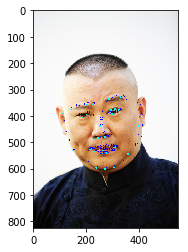

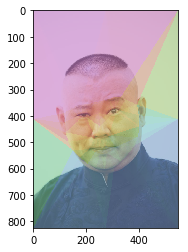

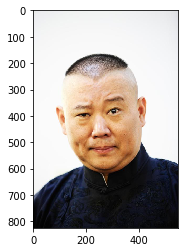

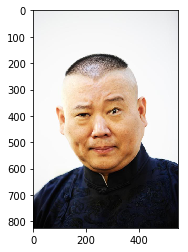

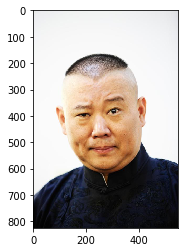

In [5]:
import cv2
import dlib
import numpy as np
import functools
#set the appropriate paths
PREDICTOR_PATH = "D:/Develop/DL/deeplearning-notes/temp/dlib/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
cascade = cv2.CascadeClassifier('../datas/haarcascade_frontalface_default.xml')

######################################## function definitions ########################################
'''
Function: rect_contains
Determines whether a point is inside a given rectangle
Inputs:
rect: the rectangle of interest
point: the point of interest
Outputs:
True if the point is inside or False if the point is outside the rectangle
'''
def rect_contains(rect, point):
    if point[0] < rect[0]:
        return False
    elif point[1] < rect[1]:
        return False
    elif point[0] > rect[2]:
        return False
    elif point[1] > rect[3]:
        return False
    return True

'''
Function: get_landmarks
This function uses the haarcascade_frontalface_default.xml cascade classifier to first detect a face in the image, and then locate
its 68 facial landmark feature points.
Inputs:
im = the image to search
Outputs:
landmarks = an array consisting of the x and y coordinates of the 68 facial landmark feature points.
'''
def get_landmarks(im):
    #get a bounding rectangle for the primary face in the image
    rects = cascade.detectMultiScale(im, 1.3, 5)
    # only get the x y w h coordinates of the first face detected
    x, y, w, h = rects[0].astype(np.int32)
    # define a rectangle that will contain the face
    rect = dlib.rectangle(x, y, x + w, y + h)

    # use our predictor to find the facial points within our bounding box
    face_points = predictor(im, rect).parts()

    #save our results in an array
    landmarks = []
    for p in face_points:
        landmarks.append([p.x, p.y])
    return landmarks


'''
Function: annotate_landmarks
Plots the 68 facial landmark points onto our image,
for reference...
FACE_POINTS = list(range(17, 68))
MOUTH_POINTS = list(range(48, 61))
RIGHT_BROW_POINTS = list(range(17, 22))
LEFT_BROW_POINTS = list(range(22, 27))
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48))
NOSE_POINTS = list(range(27, 35))
JAW_POINTS = list(range(0, 17))
CHIN_POINTS=list(range(6,11))
citing: http://stackoverflow.com/questions/37210655/opencv-detect-face-landmarks-ear-chin-ear-line
Inputs:
im - original image with face of interest
landmarks - the array of 68 landmark points
Outputs:
im - the image with points enumerated and displayed
'''
def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0], point[1])
        # put text for the enumeration
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    color=(0, 0, 255))
        # plot a circle on the image to note the point
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im


'''
Function: distanceSort
This is a comparator that assists in sorting triangles based on their distance to the top left corner of the image. (this value can be adjusted if needed)
Inputs:
a - an array consisting of the first triangle vertices (in the format: [x1,y1,x2,y2,x3,y3])
b - an array consisting of the second triangle vertices (in the format: [x1,y1,x2,y2,x3,y3])
Outputs:
-1 if triangle b is closer to the corner than triangle a
0 if they are the same distance from the corner
1 if triangle a is closer to the corner than triangle b
'''
def triDistanceSort(a, b):
    #we want to sort by distance to the POI (top left corner)
    x=0
    y=0
    #find the center point of triangle a
    aX = (a[0]+a[2]+a[4]) / 3;
    aY = (a[1]+a[3]+a[5]) / 3;
    #find the center point of triangle b
    bX = (b[0] + b[2] + b[4]) / 3;
    bY = (b[1] + b[3] + b[5]) / 3;
    #find distance from triangle a to the POI
    distA=np.sqrt( (aX - x)**2 + (aY - y)**2 )
    #find distance from triangle b to the POI
    distB = np.sqrt((bX - x) ** 2 + (bY - y) ** 2)

    #return the conventional comparator outputs
    if distA > distB:
        return -1
    elif distA < distB:
        return 1
    else:
        return 0

'''
Function: drawColoredTriangles
This function takes a list of triangles and draws them onto the image.
Inputs:
img - the image of interest
triangleList - array of triangles (each element of this array is another array of triangle vertices (in the format: [x1,y1,x2,y2,x3,y3])
disp - 1 if you would like to display the enumerated value of triangle, 0 if not
'''
def drawColoredTriangles(img, triangleList, disp):
    #sort the triangle list by distance from the top left corner in order to get a gradient effect when drawing triangles
    triangleList=sorted(triangleList, key=functools.cmp_to_key(triDistanceSort))
    h, w, c = img.shape
    #get bounding rectangle points of image
    r = (0, 0, w, h)
    #iterate through and draw all triangles in the list
    for idx, t in enumerate(triangleList):
        #grab individual vertex points
        pt1 = [t[0], t[1]]
        pt2 = [t[2], t[3]]
        pt3 = [t[4], t[5]]
        #select a position for displaying the enumerated triangle value
        pos = (t[2], t[3])
        #create the triangle
        triangle = np.array([pt1, pt2, pt3], np.int32)
        #select a color in HSV!! (manipulate idx for cool color gradients)
        color = np.uint8([[[idx, 100, 200]]])
        #color = np.uint8([[[0, 0, idx]]])
        #convert color to BGR
        bgr_color = cv2.cvtColor(color, cv2.COLOR_HSV2BGR)
        color = (int(bgr_color[(0, 0, 0)]), int(bgr_color[(0, 0, 1)]), int(bgr_color[(0, 0, 2)]))

        #draw the triangle if it is within the image bounds
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3):
            cv2.fillPoly(img, [triangle], color)
            # if display triangle number was selected, display the number.. this helps with triangle manipulation later
            if(disp==1):
                cv2.putText(img, str(idx), pos, fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=0.3, color=(0, 0, 0))





######################################## example script ########################################
'''
This script takes in an image of michael cera, displays a cool visualization of his delaunay facial triangulation,
then (inspired by the snapchat filters) uses the delaunay triangulation and affine warping to transform his face into a chubby bb.
keep in mind that the "snapchat filter" is defined for this particular image size ... the next version of this code will have it be automated/universal
'''
#read in image of michael cera
im = cv2.cvtColor(cv2.imread('../datas/face1.jpg'),cv2.COLOR_BGR2RGB)
im_copy = im.copy()
#get dimensions
h, w, c = im.shape
rect = (0, 0, w, h)
#show 68 facial landmarks for reference
# cv2.imshow('Result1', annotate_landmarks(im, get_landmarks(im)))
plt.figure()
plt.imshow(annotate_landmarks(im, get_landmarks(im)))

#create a planar subdivision object that spans the entire image
subdiv = cv2.Subdiv2D(rect)
#get the 68 facial landmarks
points = get_landmarks(im)
#insert each landmark point into our planar subdivision object, which uses Delaunay Triangulation to divide the image
for p in points:
    subdiv.insert((p[0], p[1]))

#insert image edge points into the Delaunay Triangulation for enhanced visualization
subdiv.insert((0, h - 1))
subdiv.insert((w / 2, h - 1))
subdiv.insert((w / 2, 0))
subdiv.insert((0, h / 2))
subdiv.insert((w - 1, h / 2))
subdiv.insert((w - 1, h - 1))
subdiv.insert((w - 1, 0))
subdiv.insert((1, 1))

#draw the triangles for a sweet visualization
drawColoredTriangles(im, subdiv.getTriangleList(), 0)
# cv2.imshow('Delaunay Triangulation Visualization', im)
#draw the triangles onto the image for another sweet visualization
blended = cv2.addWeighted(im_copy, 0.4, im, 0.6, 0)
# cv2.imshow('Blended Delaunay Triangulation', blended)
plt.figure()
plt.imshow(blended)

################################ make michael cera a chipmunk ###############################

#create a blank image to draw to
warpedImage = 255 * np.ones(im.shape, dtype=im.dtype)
#get a copy of the original michael cera triangulation list
triangleList = subdiv.getTriangleList()
#make a copy of the list to adjust for warping
dstList = triangleList.copy()

#by using the drawColoredTriangles function (disp=1), I was able to select the points I wanted to adjust and input those numbers into the triIndex below.
triIndex = [35, 21, 113, 68, 62, 59]
#this array corresponds to how many pixels you want to move each triangle (in the x direction)
size = [10, 12, 8, -10, -12, -10]
#iterate through the list and adjust each triangle point in the destination list IF it corresponds to one of the points in our triIndex
for num, s in zip(triIndex, size):
    for p in dstList:
        if p[0] == triangleList[num, 2] and p[1] == triangleList[num, 3]:
            p[0] = p[0] - s

        elif p[2] == triangleList[num, 2] and p[3] == triangleList[num, 3]:
            p[2] = p[2] - s

        elif p[4] == triangleList[num, 2] and p[5] == triangleList[num, 3]:
            p[4] = p[4] - s

# drawColoredTriangles2(im_copy, dstList)
# cv2.imshow('Result5', im_copy)
plt.figure()
plt.imshow(im_copy)

#now that we have two separate planar triangular subdivisions, we warp each individual triangle from triangleList to dstList using an AffineTransform
for src, dst in zip(triangleList, dstList):
    pt1 = [src[0], src[1]]
    pt2 = [src[2], src[3]]
    pt3 = [src[4], src[5]]

    if rect_contains(rect, pt1) and rect_contains(rect, pt2) and rect_contains(rect, pt3):
        tri1 = np.float32([[[src[0], src[1]], [src[2], src[3]], [src[4], src[5]]]])
        tri2 = np.float32([[[dst[0], dst[1]], [dst[2], dst[3]], [dst[4], dst[5]]]])
        r1 = cv2.boundingRect(tri1)
        r2 = cv2.boundingRect(tri2)
        tri1Cropped = []
        tri2Cropped = []

        for i in range(0, 3):
            tri1Cropped.append(((tri1[0][i][0] - r1[0]), (tri1[0][i][1] - r1[1])))
            tri2Cropped.append(((tri2[0][i][0] - r2[0]), (tri2[0][i][1] - r2[1])))

        M = cv2.getAffineTransform(np.float32(tri1Cropped), np.float32(tri2Cropped))
        img1Cropped = im_copy[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]

        warpedImageCropped = cv2.warpAffine(img1Cropped, M, (r2[2], r2[3]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

        # get mask by filling triangle
        mask = np.zeros((r2[3], r2[2], 3), dtype=np.float32)
        cv2.fillConvexPoly(mask, np.int32(tri2Cropped), (1.0, 1.0, 1.0), 16, 0)
        # Apply mask to cropped region
        warpedImageCropped = warpedImageCropped * mask

        # Copy triangular region of the rectangular patch to the output image
        warpedImage[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] = warpedImage[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] * ((1.0, 1.0, 1.0) - mask)
        warpedImage[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] = warpedImage[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] + warpedImageCropped

plt.figure()
plt.imshow(warpedImage)
#show the new warped image
# cv2.imshow('Warped Image', warpedImage)
# cv2.imshow('original image', im_copy)
plt.figure()
plt.imshow(im_copy)
# cv2.waitKey(0)
# cv2.destroyAllWindows()